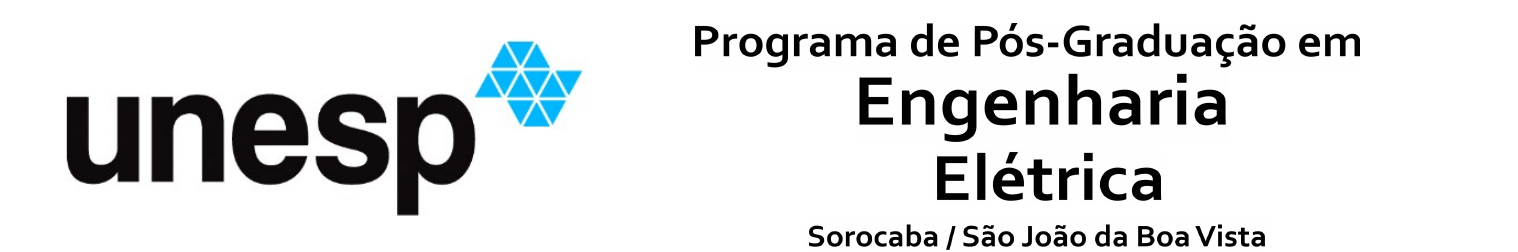


## **Disciplina:** Aprendizado de Máquina Não Supervisionado (*Unsupervised Machine Learning*) - 2022

### *Website: https://bit.ly/unsml22 - Prof. Luiz Fernando S. Coletta* (luiz.coletta@unesp.br)

### **Exercício:** Agrupar os pixels da seguinte cena [street_scene.png](https://github.com/luizfsc/datasets/blob/master/UNSML/street_scene.png) com o intuito, por exemplo, de reconhecer os carros (brancos) na estrada. Estudar e usar para isso a biblioteca [Open-CV](https://opencv.org/). Verificar exemplos na internet, como [este](https://www.thepythoncode.com/article/kmeans-for-image-segmentation-opencv-python).



### Carregando imagem Original

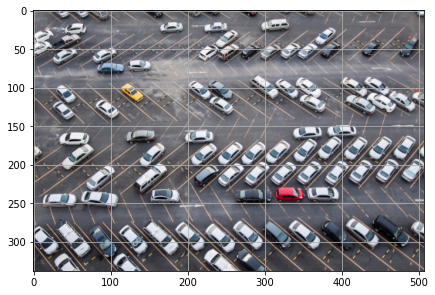

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
import matplotlib.colors as mcolors

image = cv2.imread("images/darkb.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(7,7))
plt.grid(visible=None)
plt.imshow(image)
plt.show()

In [2]:
def segment_image (k, image, color):
  
  # reshape the image to a 2D array of pixels and 3 color values (RGB)
  pixel_values = image.reshape((-1, 3))
  # convert to float
  pixel_values = np.float32(pixel_values)
  
  # define stopping criteria
  criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
  # segments the image pixels into clusters
  _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  # convert back to 8 bit values
  centers = np.uint8(centers)
  # flatten the labels array
  labels = labels.flatten()
  # convert all pixels to the color of the centroids
  segmented_image = centers[labels.flatten()]
  # reshape back to the original image dimension
  segmented_image = segmented_image.reshape(image.shape)

  # finding the closest center of the chosen color
  cluster = 0
  i = 0
  d = distance.euclidean(centers[i],color)
  for center in centers:
    if(distance.euclidean(center,color)<d):
      d = distance.euclidean(center,color)
      cluster = i
    i+=1
  
  # disable only the cluster number 2 (turn the pixel into black)
  masked_image = np.copy(image)
  # convert to the shape of a vector of pixel values
  masked_image = masked_image.reshape((-1, 3))
  # color (i.e cluster) to disable
  masked_image[labels == cluster] = [255, 0, 0]
  # convert back to original shape
  masked_image = masked_image.reshape(image.shape)

  return segmented_image, masked_image

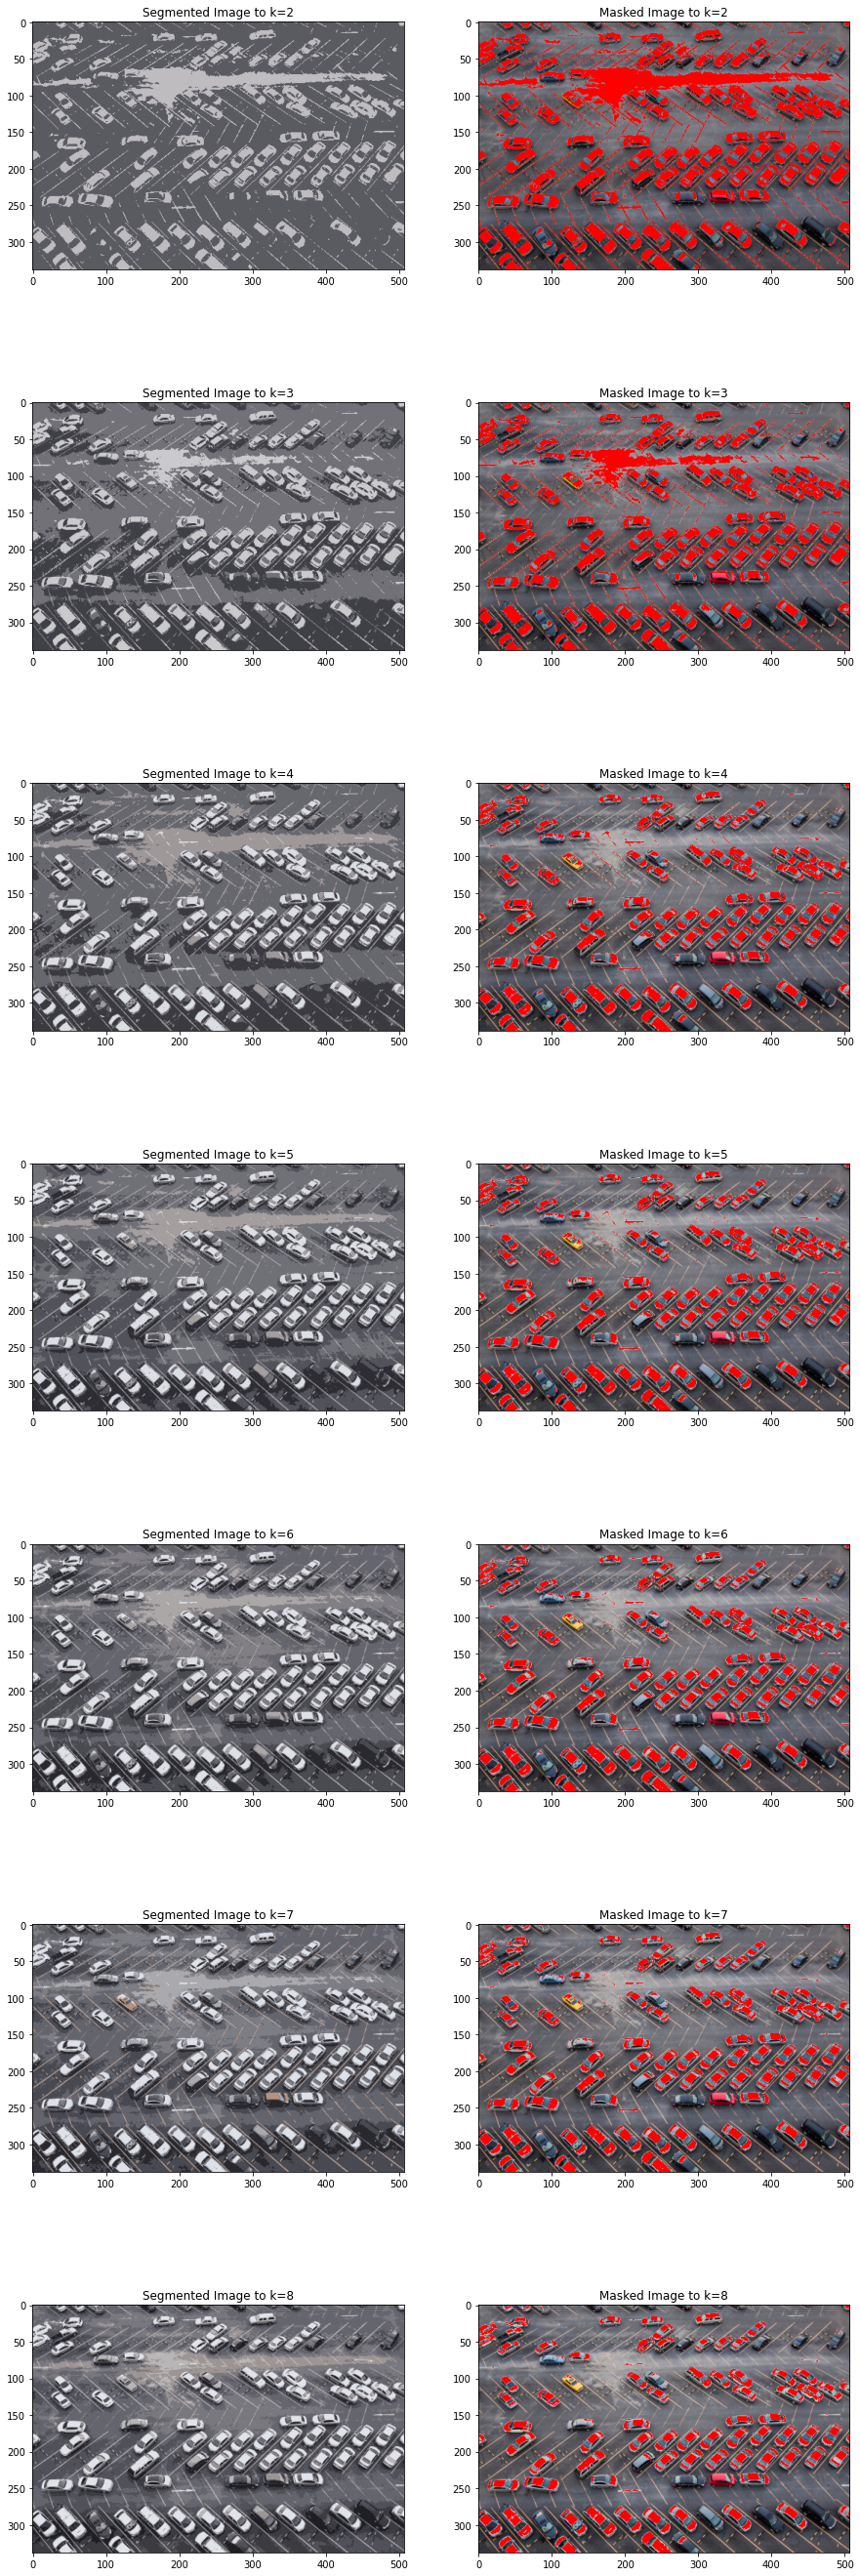

In [5]:
search_color=[255, 255, 255]

n_max_k = 9
fig, axs = plt.subplots(n_max_k-2, 2, figsize=(15, (n_max_k-2)*7))


for i in range(2,n_max_k):
  # Choode the number of clusters, pass the original image and the color that you want find
  segmented_image, masked_image = segment_image(i, image, search_color)

  # show the image
  axs[i-2,0].imshow(segmented_image)
  axs[i-2,0].title.set_text(("Segmented Image to k=" + str(i)))
  axs[i-2,1].imshow(masked_image)
  axs[i-2,1].title.set_text(("Masked Image to k=" + str(i)))


plt.show()